# Pendahuluan

Sebagai Data Analyst pada waralaba pusat kebugaran Model Fitness, dimana ingin menambah jumlah customer dengan melibatkan customer itu sendiri. Strategi ini bisa di buat dengan melihat customer churn dan hal ini untuk pengembangan keterlibatan customer dengan mengurangi tingkat churn dengan digitalisasi untuk meningkatkan retensi pelanggan

Tingkat churn di jadikan sebagai indikator untuk pemilahan bidang, di lihat dari user melakukan transkasi daring secara teratur, berbeda jika user memiliki jeda. Bidang ini yang bisa di jadikan bahan analysis, Terlebih lagi jika user tidak kembali mengunjungi kembali



# Tujuan

- Mempelajari cara memprediksi probabilitas *churn* (untuk bulan berikutnya) bagi setiap pelanggan
- Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan, dan mendeskripsikan karakter utamanya
- Menganalisis faktor-faktor yang paling memengaruhi *churn*
- Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan
    - Mengidentifikasi kelompok yang ditargetkan
    - Merekomendasikan langkah-langkah untuk mengurangi *churn*
    - Menjelaskan pola lain yang Anda temui terkait dengan interaksi pelanggan

# Tahapan

1. Ihktisar Data
2. Analisis Data Eksploratif
3. Membangun Model untuk Memprediksi Churn 
4. Membuat Klaster Pengguna
5. Kesimpulan dan Rekomendasi

## Ihtisar Data 

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score



pd.set_option('display.precision', 15)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,0
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,0
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,0


In [9]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

## Analisis Data Exploratif

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [11]:
df.shape

(4000, 14)

In [12]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000
mean,0.510250000000000,0.845250000000000,0.486750000000000,0.308500000000000,0.903500000000000,4.681250000000000,0.412250000000000,29.184249999999999,146.943727809250021,4.322750000000000,3.72475000000000,1.879019712534941,1.767051822040509,0.265250000000000
std,0.499957425044109,0.361711412989097,0.499886896434881,0.461931916275353,0.295312634995682,4.549705857893457,0.492301256987948,3.258367102790019,96.355602395679895,4.191297434094206,3.74926682004919,0.972244872030618,1.052905717489530,0.441521429596802
min,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,18.000000000000000,0.148204788456624,1.000000000000000,0.00000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,27.000000000000000,68.868829978416670,1.000000000000000,1.00000000000000,1.180875086219582,0.963002948193214,0.000000000000000
50%,1.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,29.000000000000000,136.220158971036881,1.000000000000000,3.00000000000000,1.832768412113406,1.719574310109868,0.000000000000000
75%,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,6.000000000000000,1.000000000000000,31.000000000000000,210.949624655502134,6.000000000000000,5.00000000000000,2.536078338329289,2.510336265936281,1.000000000000000
max,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,12.000000000000000,1.000000000000000,41.000000000000000,552.590740386879816,12.000000000000000,31.00000000000000,6.023668475995910,6.146782880452392,1.000000000000000


In [13]:
df.duplicated().sum()

0

In [14]:
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [15]:
df['churn'].describe()

count    4000.000000000000000
mean        0.265250000000000
std         0.441521429596802
min         0.000000000000000
25%         0.000000000000000
50%         0.000000000000000
75%         1.000000000000000
max         1.000000000000000
Name: churn, dtype: float64

In [16]:
df['churn'].value_counts() / df.shape[0] * 100

0    73.474999999999994
1    26.524999999999999
Name: churn, dtype: float64

#### Kesimpulan Awal

- Tidak ada data duplikat
- Persebaran data terlihat normal dan siap untuk di telaah lebih lanjut 

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Pengecekan data yang hilang 

In [17]:
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

#### Kesimpulan awal 
- churn di dominasi oleh user yang tidak churn sebanyak 73 % atau 2939 User

### Membuat fungsi untuk memperlihatkan histogram 

In [18]:
def feat_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new[group_col]==cl][c], 
                         label='{} = {}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

In [19]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037427696495,0.873086083701939,0.534195304525349,0.353521605988431,0.903708744470908,5.747192922762845,0.464103436543042,29.976522626743790,158.445714801611530,5.283089486219803,4.711806736985369,2.024875642518551,2.027881733095180
1,0.510838831291235,0.768143261074458,0.355325164938737,0.183788878416588,0.902921771913289,1.728557964184731,0.268614514608860,26.989632422243165,115.082898619287278,1.662582469368520,0.990574929311970,1.474994662372975,1.044545593398017


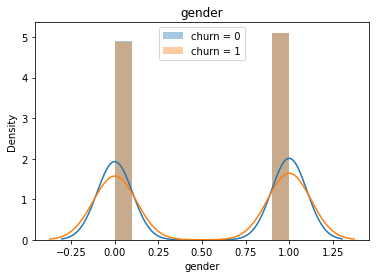

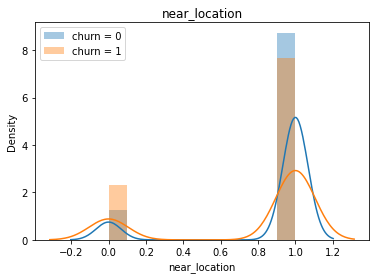

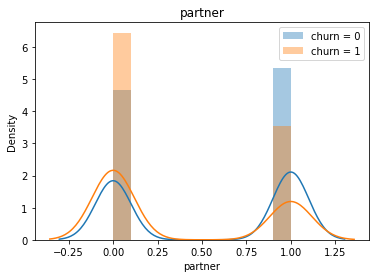

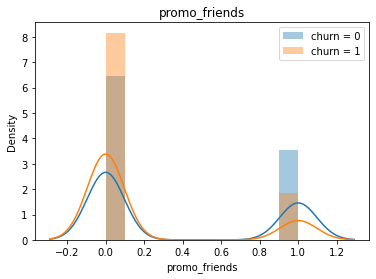

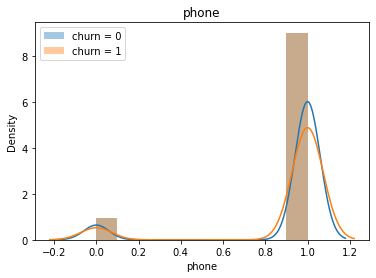

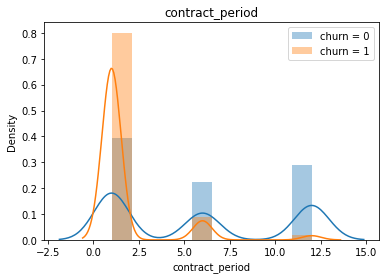

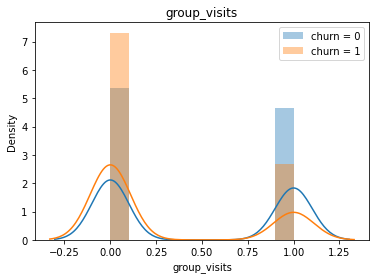

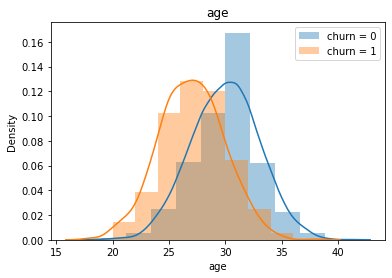

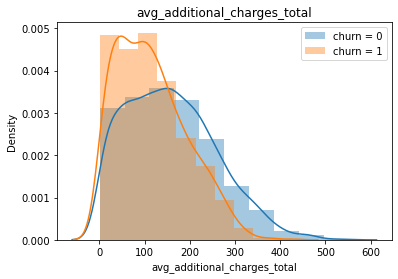

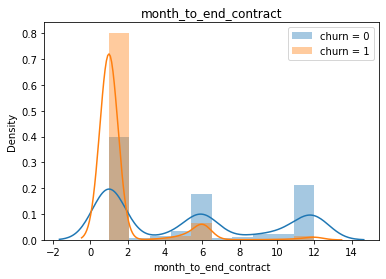

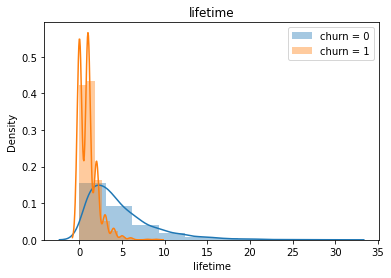

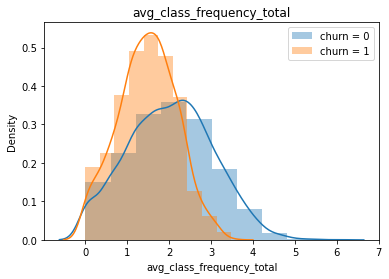

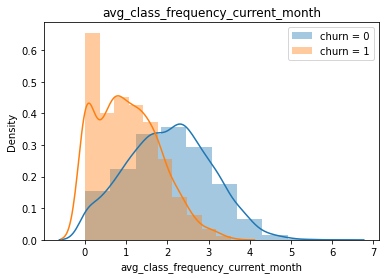

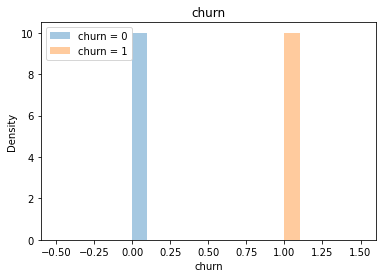

In [20]:
feat_hist(df, 'churn', df.columns)

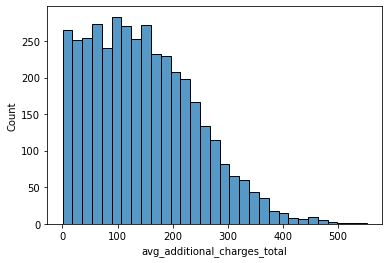

In [21]:
sns.histplot(df['avg_additional_charges_total']);

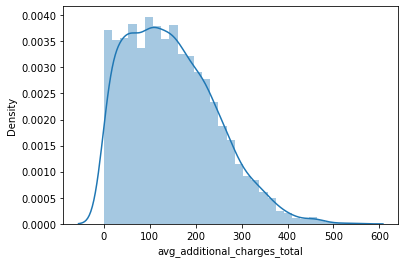

In [22]:
sns.distplot(df['avg_additional_charges_total']);

### Korelasi matrix churn

In [23]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000000000000,0.006699227595081,-0.010462622250800,-0.005033272441054,-0.008542118064000,0.000502261220279,0.017878940218984,0.013806900920360,-0.009334436022097,-0.001280790522073,0.013578571154470,0.014620159193698,0.009156488375539,0.000707733985153
near_location,0.006699227595081,1.000000000000000,-0.005119431260763,0.210964279250089,-0.015763230257229,0.150232831416567,0.154728047973810,0.058357839446367,0.040761205686103,0.143960652863483,0.070920564055164,0.043127478605891,0.062663633458793,-0.128097990299810
partner,-0.010462622250800,-0.005119431260763,1.000000000000000,0.451959803638693,0.009969610205313,0.306166251238889,0.022709566916954,0.047479698759628,0.022941185300935,0.294632124877685,0.061229353260985,0.024937869800103,0.045561091361999,-0.157985736985098
promo_friends,-0.005033272441054,0.210964279250089,0.451959803638693,1.000000000000000,0.001981592231935,0.244551568070672,0.120169506269850,0.050113307413902,0.036897676000240,0.239553224750288,0.072721100932983,0.028063220773726,0.053768377063076,-0.162233077833515
phone,-0.008542118064000,-0.015763230257229,0.009969610205313,0.001981592231935,1.000000000000000,-0.006893264000346,-0.010099146860770,-0.011403238953259,0.009279431489794,-0.011196256833938,-0.018801227382775,0.008340465501805,0.013374852916164,-0.001176601362480
contract_period,0.000502261220279,0.150232831416567,0.306166251238889,0.244551568070672,-0.006893264000346,1.000000000000000,0.169990834019106,0.138249289429536,0.111445063341492,0.973063587268638,0.170725270972972,0.096211136398092,0.159407376566591,-0.389984211586078
group_visits,0.017878940218984,0.154728047973810,0.022709566916954,0.120169506269850,-0.010099146860770,0.169990834019106,1.000000000000000,0.080933568901738,0.032079086460016,0.163702563158596,0.075852846038239,0.056694752430919,0.075923274727096,-0.175324655498149
age,0.013806900920360,0.058357839446367,0.047479698759628,0.050113307413902,-0.011403238953259,0.138249289429536,0.080933568901738,1.000000000000000,0.080240125272997,0.134511341398497,0.164692820019427,0.119953132113990,0.183094542154536,-0.404735252823589
avg_additional_charges_total,-0.009334436022097,0.040761205686103,0.022941185300935,0.036897676000240,0.009279431489794,0.111445063341492,0.032079086460016,0.080240125272997,1.000000000000000,0.113958039016871,0.079028338696600,0.044426412947373,0.079569677409450,-0.198697451068203
month_to_end_contract,-0.001280790522073,0.143960652863483,0.294632124877685,0.239553224750288,-0.011196256833938,0.973063587268638,0.163702563158596,0.134511341398497,0.113958039016871,1.000000000000000,0.161077551415275,0.085386674018559,0.147605112323244,-0.381392983695714


In [24]:
df.corr().head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000000000000,0.006699227595081,-0.010462622250800,-0.005033272441054,-0.008542118064000,0.000502261220279,0.017878940218984,0.013806900920360,-0.009334436022097,-0.001280790522073,0.013578571154470,0.014620159193698,0.009156488375539,0.000707733985153
near_location,0.006699227595081,1.000000000000000,-0.005119431260763,0.210964279250089,-0.015763230257229,0.150232831416567,0.154728047973810,0.058357839446367,0.040761205686103,0.143960652863483,0.070920564055164,0.043127478605891,0.062663633458793,-0.128097990299810
partner,-0.010462622250800,-0.005119431260763,1.000000000000000,0.451959803638693,0.009969610205313,0.306166251238889,0.022709566916954,0.047479698759628,0.022941185300935,0.294632124877685,0.061229353260985,0.024937869800103,0.045561091361999,-0.157985736985098
promo_friends,-0.005033272441054,0.210964279250089,0.451959803638693,1.000000000000000,0.001981592231935,0.244551568070672,0.120169506269850,0.050113307413902,0.036897676000240,0.239553224750288,0.072721100932983,0.028063220773726,0.053768377063076,-0.162233077833515
phone,-0.008542118064000,-0.015763230257229,0.009969610205313,0.001981592231935,1.000000000000000,-0.006893264000346,-0.010099146860770,-0.011403238953259,0.009279431489794,-0.011196256833938,-0.018801227382775,0.008340465501805,0.013374852916164,-0.001176601362480


In [25]:
df.corr()['churn']

gender                               0.000707733985153
near_location                       -0.128097990299810
partner                             -0.157985736985098
promo_friends                       -0.162233077833515
phone                               -0.001176601362480
contract_period                     -0.389984211586078
group_visits                        -0.175324655498149
age                                 -0.404735252823589
avg_additional_charges_total        -0.198697451068203
month_to_end_contract               -0.381392983695714
lifetime                            -0.438219968447980
avg_class_frequency_total           -0.249715111332895
avg_class_frequency_current_month   -0.412348390707265
churn                                1.000000000000000
Name: churn, dtype: float64

#### Kesimpulan awal 
1. semakin tinggi lifetime nilainya maka nilai churn semakin kecil (0) atau semakin tidak churn 
2. semakin tinggi charge maka semakin tinggi juga niali churn (semakin akan churn)

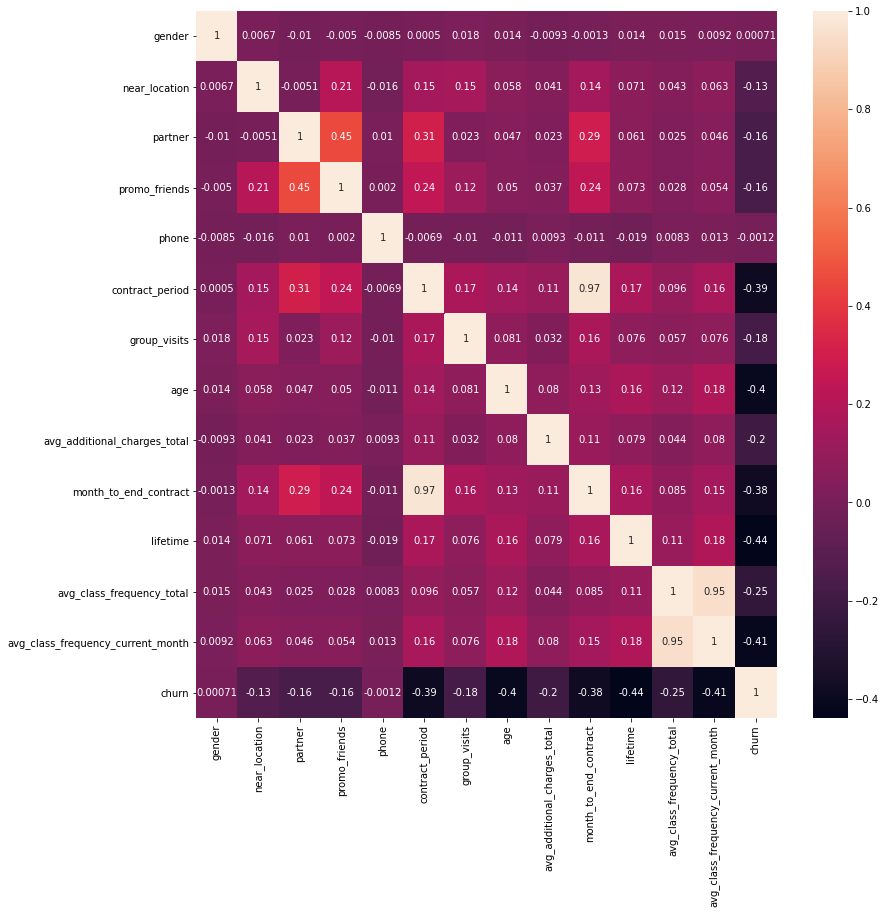

In [21]:
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Kesimpulan Awal 
- Untuk variabel age persebaran data user di dominasi 25 dan 30 tahun dan untuk user dengan churn rate tinggi 28 sampai 33 tahun 
- Variable phone meng isyaratkan user churn di donminasi oleh user yang tidak memberikan no telphone 
- Untuk rata-rata total biaya tambahan user churn banyak pemasukan dari user yang tidak langganan jangka panjang 
- Pada heatmap semakin tinggi rata-rata frekuensi kunjungan per minggu pada bulan sebelumnya untuk user, maka semakin rendah nilai churn atau tingkat churn.

### Membuat Model untuk Prediksi Churn User

# Regresi Logistik

In [22]:
X = df.drop(columns='churn', axis=1) #fitur
y = df['churn'] #target

In [23]:
# Membagi target variabel dan fitur menjadi data training set dan data set validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=0)

In [24]:
#Definisi model algoritma untuk Regresi Logistik
model_reg = LogisticRegression(random_state=0) 

# Melatih model 
model_reg.fit(X_train, y_train)

# Prediksi model
predict_reg = model_reg.predict(X_val)
predict_reg_proba = model_reg.predict_proba(X_val)

In [25]:
print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_val, predict_reg)))
print('Precision score for logistic regression is: {:.2f}'.format(precision_score(y_val, predict_reg)))
print('Recall score for logistic regression is: {:.2f}'.format(recall_score(y_val, predict_reg)))

Accuracy score for logistic regression is: 0.92
Precision score for logistic regression is: 0.87
Recall score for logistic regression is: 0.81


# Random Forest Model

In [26]:
# Definisi model algoritma untuk Random Forest Classifier
model_rf = RandomForestClassifier(random_state=0)

# Melatih Model
model_rf.fit(X_train, y_train)

# Prediksi Model
predict_rf = model_rf.predict(X_val)
predict_rf_proba = model_rf.predict_proba(X_val)


In [27]:
print('Accuracy score for random forest is: {:.2f}'.format(accuracy_score(y_val, predict_rf)))
print('Precision score for random forest is: {:.2f}'.format(precision_score(y_val, predict_rf)))
print('Recall score for random forest is: {:.2f}'.format(recall_score(y_val, predict_rf)))

Accuracy score for random forest is: 0.92
Precision score for random forest is: 0.84
Recall score for random forest is: 0.82


#### Kesimpulan Awal
- Kedua model tersebut memberikan hasil yang cukup baik. Proporsi jawaban yang benar sama untuk kedua model, tetapi metrik akurasi dan daya ingat sedikit lebih baik untuk regresi logistik. Mungkin karena hutan acak terlalu berlebihan. Bagaimanapun, sebagai permulaan, kita dapat membuat pilihan yang mendukung yang pertama

- Algoritma Logistic Regression dan Algoritma Random Forest memiliki hasil yang sama dengan skor tingkat akurasi 92% Namun, terdapat penurunan skor matriks presisi pada algoritma random forest tetapi perbedaan antara kedua kesalahan matriks tersebut tidak terlalu signifikan. Dan selisih skor recall dalam algoritma random forest lebih tinggi sebesar 1% daripada skor recall dalam regresi logistik

## Membuat Klaster Pengguna

In [29]:
# Standarisasi data 
sc = StandardScaler()
x_sc = sc.fit_transform(df.drop(columns = ['churn']))

In [30]:
data = df.drop(columns='churn', axis=0)
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207


### Membuat variabel untuk visualisasi jarak data matrik

In [34]:
linked = linkage(x_sc, method = 'ward')

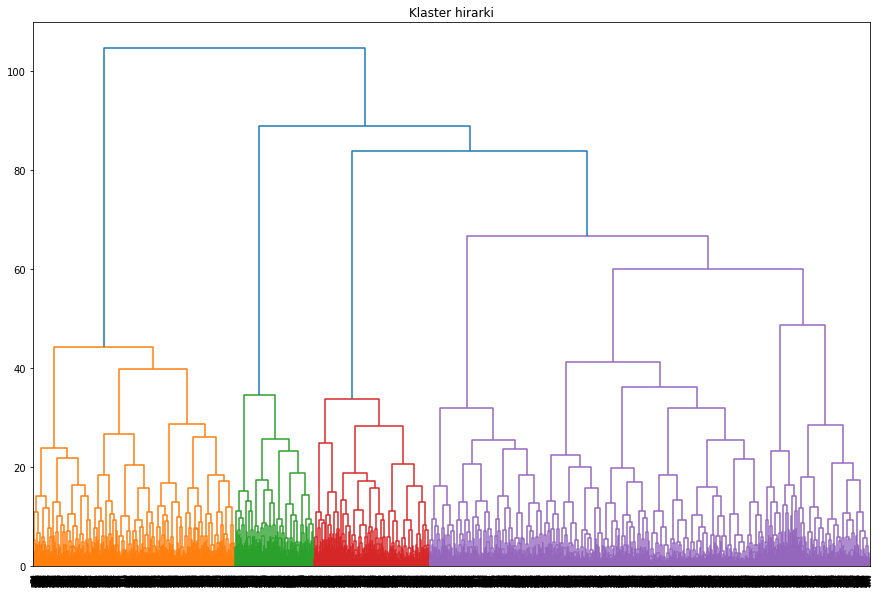

In [35]:
plt.figure(figsize=(15, 10))  
dendrogram(linked,orientation='top')
plt.title('Klaster hirarki')
plt.show()

### Model Kmeans

In [51]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(df.drop(columns = ['churn']))

### Prediksi dan melatih model 

In [52]:
df['cluster_km'] = labels
data['cluster_km'] = labels

In [53]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,0,2
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,0,2
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,0,4


In [54]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster_km
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,2
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,2
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,4


### Grafik Distribusi data klaster

In [55]:
def feat_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new[group_col]==cl][c], 
                         label='{} = {}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

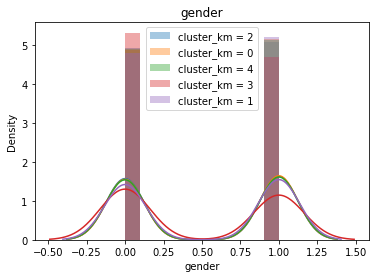

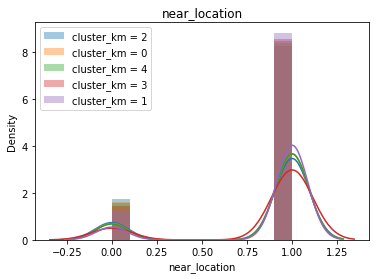

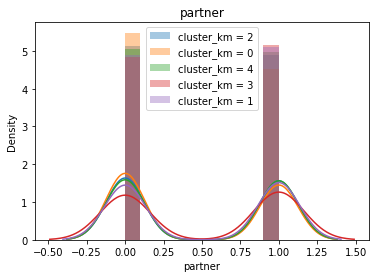

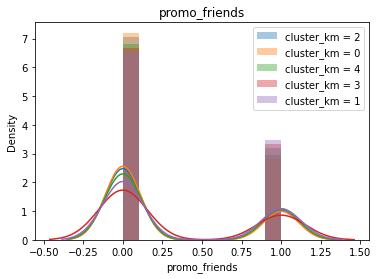

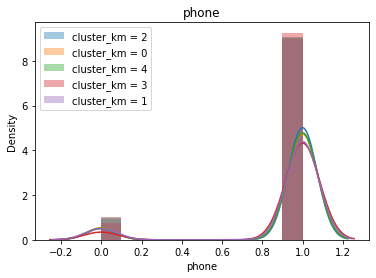

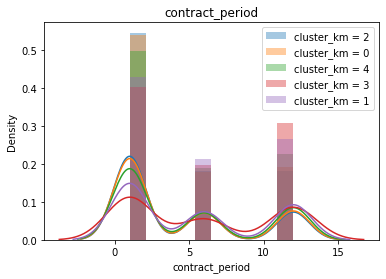

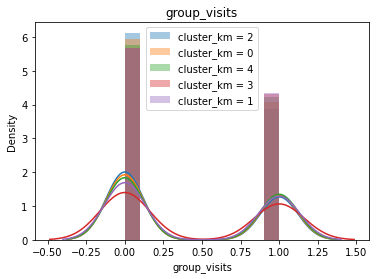

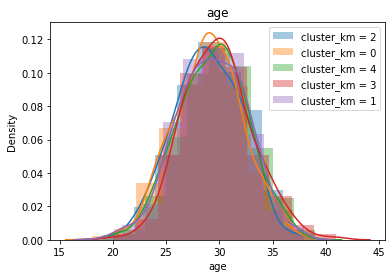

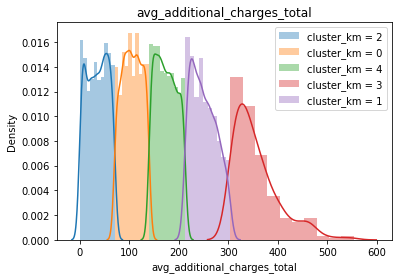

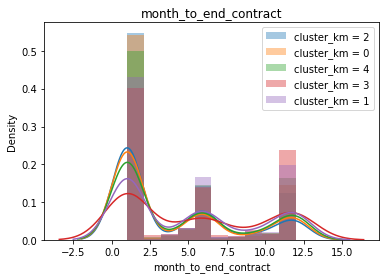

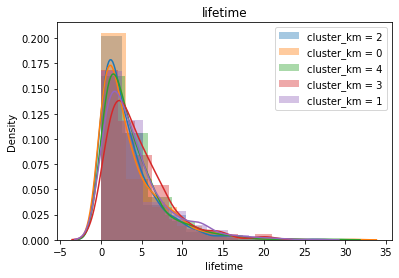

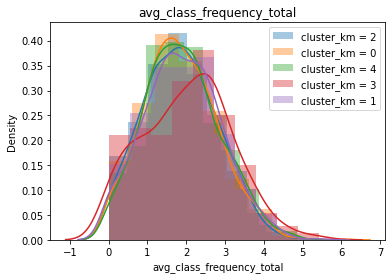

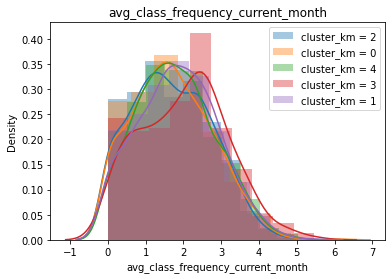

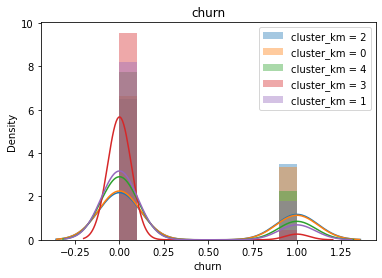

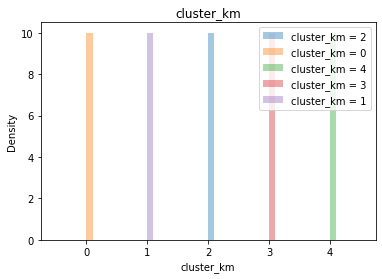

In [59]:
feat_hist(df, 'cluster_km', df.columns)

### Rata Rata persebaran data pada klaster

In [56]:
df.groupby(['cluster_km']).count()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029
1,706,706,706,706,706,706,706,706,706,706,706,706,706,706
2,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032
3,271,271,271,271,271,271,271,271,271,271,271,271,271,271
4,962,962,962,962,962,962,962,962,962,962,962,962,962,962


In [58]:
df.groupby(['cluster_km']).sum()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,529,864,465,288,924,4426,419,29814,109004.855450791757903,4112.0,3647,1906.288534569899412,1757.803490347468141,344
1,368,622,361,245,634,3813,306,20717,177195.245311930659227,3531.0,2944,1343.857034042793430,1301.338252663641924,126
2,525,851,504,303,937,4333,400,29834,36739.945103929218021,3979.0,3503,1895.531070383711494,1746.805329722023089,361
3,127,232,140,90,251,1578,117,8088,96606.611189195973566,1459.0,1198,547.219401855915976,544.542510836931342,12
4,492,812,477,308,868,4575,407,28284,168228.254181151976809,4210.0,3607,1823.182809287429791,1717.717704591970232,218


In [61]:
# look at the share of outflow by cluster
df.groupby(['cluster_km']).mean()['churn']

cluster_km
0    0.334305150631681
1    0.178470254957507
2    0.349806201550388
3    0.044280442804428
4    0.226611226611227
Name: churn, dtype: float64

In [62]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster_km
churn,,,,,,,,,,,,,,
0,0.510037427696495,0.873086083701939,0.534195304525349,0.353521605988431,0.903708744470908,5.747192922762845,0.464103436543042,29.976522626743790,158.445714801611899,5.283089486219803,4.711806736985369,2.024875642518554,2.027881733095179,1.930928887376659
1,0.510838831291235,0.768143261074458,0.355325164938737,0.183788878416588,0.902921771913289,1.728557964184731,0.268614514608860,26.989632422243165,115.082898619287263,1.662582469368520,0.990574929311970,1.474994662372977,1.044545593398017,1.655042412818096


# Kesimpulan

- Untuk setiap cluster pada kolom umur rata-rata umur antara 26-30
- Untuk churn user, rata-rata di cluster 1 adalah 0,99, dimana angka tersebut lebih tinggi dari rata-rata cluster lainnya. itu berarti churn user rata-rata adalah dari cluster 1
- Jenis kelamin tidak memiliki korelasi dengan churn user, dan fitur lain seperti lokasi dekat, mitra, teman promo, dan sebagainya, memiliki korelasi negatif yang lemah. artinya churn (variabel target) dan variabel fitur memiliki korelasi terbalik dimana semakin tinggi nilai variabel fitur, semakin rendah churn user. misalnya semakin tinggi rata-rata frekuensi kunjungan per minggu selama bulan sebelumnya untuk user, maka semakin rendah churn rate atau nilai churn.
- Penggunaan algoritma regresi logistik dan hutan acak untuk memprediksi tingkat churn. kedua algoritma tersebut tidak berbeda karena skor akurasi, presisi, dan recall yang kami gunakan untuk melihat kesalahan yang cenderung dibuat oleh algoritma tidak terlalu signifikan.
- rata-rata user yang tidak melakukan churn harus mengunjungi pusat kebugaran kami sudah 4 bulan setelah kunjungan pertama mereka. Namun untuk user churn rata-rata adalah 1 bulan dari kunjungan pertama mereka.
- rata-rata user yang tidak melakukan churn memiliki masa kontrak lebih dari 3 bulan.
- rata-rata bulan sebelum kontrak berakhir untuk churn user adalah 1-2 bulan.
- Cluster yang paling tepat adalah "2". Klien yang paling "dapat diandalkan" berasal dari cluster "0" dan "4"

Rekomendasi

- Memberikan pemberitahuan habisnya masa langganan user 1 atau 2 bulan sebelum masa langganan mereka habis

# Saran Reviewer